In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
reglog_regdata = pd.read_csv(r"./RegularizedLogisticRegression.txt")

In [3]:
reglog_regdata

,Test-1 Score,test-2 Score,Output
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [4]:
reglog_regdata.describe()

,Test-1 Score,test-2 Score,Output
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [5]:
def plot_fn(X,Y,length):
    positive = (Y==1).reshape(length,1)
    negative = (Y==0).reshape(length,1)
    plt.scatter(X[positive[:,0],0],X[positive[:,0],1],c="r",marker='x')
    plt.scatter(X[negative[:,0],0],X[negative[:,0],1],c="b",marker='o')
    plt.xlabel("Test-1 Score")
    plt.ylabel("Test-2 Score")
    plt.title("Visualization Plot between Test 1 and Test 2")
    #plt.legend(["Admitted","Not Admitted"])
    plt.show()

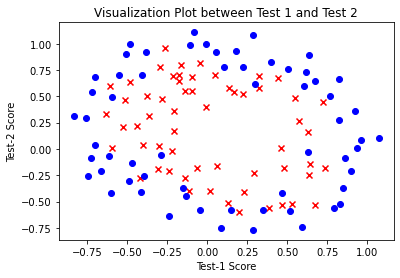

In [6]:
log_reg_data = reglog_regdata.values
X = log_reg_data[:,0:log_reg_data.shape[1]-1]
y = log_reg_data[:,-1]
X1 = log_reg_data[:,0:log_reg_data.shape[1]-1]
length = len(y)
plot_fn(X,y,length)

In [7]:
def Sigmoid_fn(Z):
    return(1/(1 + np.exp(-Z)))

In [8]:
def Prediction(X,weights):
    Z = np.dot(X,weights)
    y_hat = Sigmoid_fn(Z)
    return y_hat

In [9]:
def Compute_cost(y,y_hat,weights,regfactor,m):
    J = (-1/m) * (y.T @ np.log(y_hat) + (1 - y.T) @ np.log(1 - y_hat))
    reg = (regfactor/(2*m)) * (weights[1:].T @ weights[1:])
    J = J + reg
    return float(J)

In [10]:
def Gradient_descent(num_iterations,X,y,weights,cost,alpha,m,regfactor):
    for i in range(1,num_iterations+1):
        y_hat = Prediction(X,weights)
        grad = (1/m) * (X.T @ (y_hat - y))
        grad[1:] = grad[1:] + ((regfactor/m) * grad[1:])
        descent_step = alpha * grad
        weights -= descent_step
        cost.append(Compute_cost(y,y_hat,weights,regfactor,m))
    return weights,cost

In [11]:
def Initialize_Parameters(X,y,length):
    X = X.reshape(length,X.shape[1])
    y = y.reshape(length,1)
    weights = np.zeros((X.shape[1],1))
    return X,y,weights

In [14]:
def feature_scaling(X):
    mean = np.mean(X)
    std = np.std(X)
    
    X_norm = (X - mean)/std
    
    return X_norm

In [15]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out



In [16]:
X = mapFeature(feature_scaling(X[:,0]), feature_scaling(X[:,1]),6)

In [17]:
X,y,weights = Initialize_Parameters(X,y,length)

In [18]:
alpha = 0.08
regfactor=1
num_iterations = 1200

cost = []
final_weights,cost = Gradient_descent(num_iterations,X,y,weights,cost,alpha,length,regfactor)

In [19]:
def plot_cost(cost,num_iterations):
    iterations = [i for i in range(1,num_iterations+1)]
    plt.plot(iterations,cost,color="g")
    plt.title("cost v/s Num of Iterations")
    plt.show()

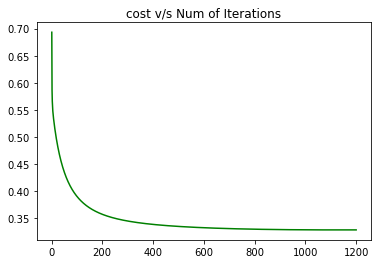

In [20]:
plot_cost(cost,num_iterations)

In [21]:
cost.index(min(cost))

1132

In [22]:
pred = [Sigmoid_fn(np.dot(X, final_weights)) >= 0.5]
np.mean(pred == y.flatten()) * 100

49.94254524561907

## Using fminc Optimization

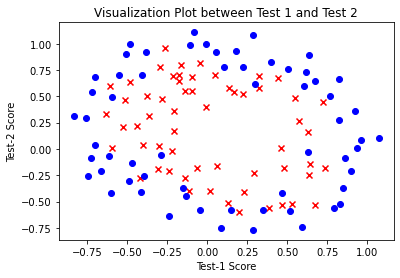

In [24]:
log_reg_data = reglog_regdata.values
X = log_reg_data[:,0:log_reg_data.shape[1]-1]
y = log_reg_data[:,-1]
X1 = log_reg_data[:,0:log_reg_data.shape[1]-1]
length = len(y)
plot_fn(X,y,length)

In [25]:
def Compute_cost_opt(weights, X, y, lmbda):
    m=len(y)
    J = (-1/m) * (y.T @ np.log(Sigmoid_fn(X @ weights)) + (1 - y.T) @ np.log(1 - Sigmoid_fn(X @ weights)))
    reg = (lmbda/(2*m)) * (weights[1:].T @ weights[1:])
    J = J + reg
    return J

In [26]:
def Gradient_descent_opt(weights,X,y,regfactor):
    m = len(y)
    #grad = np.zeros([m,1])
    #print(grad.shape)
    y_hat = Prediction(X,weights)
    grad = (1/m) * (X.T @ (y_hat - y))
    grad[1:] = grad[1:] + ((regfactor/m) * grad[1:])
    return grad

In [27]:
X = mapFeature(feature_scaling(X[:,0]), feature_scaling(X[:,1]),6)
#X,y,weights = Initialize_Parameters(X,y,length)
(m, n) = X.shape
y = y[:, np.newaxis]
weights = np.zeros((n,1))
lmbda = 1

In [28]:
lmbda=1
J = Compute_cost_opt(weights, X, y, lmbda)
float(J)

0.6931471805599453

In [29]:
import scipy.optimize as opt
output = opt.fmin_tnc(func = Compute_cost_opt, x0 = weights.flatten(), fprime = Gradient_descent_opt, \
                         args = (X, y.flatten(), lmbda))
theta = output[0]
print(theta) # theta contains the optimized values

[ 2.3945511  -0.32007316  0.40890887  0.49591913 -0.51590033  0.07063798
  0.23842245  0.43538968  0.08464502 -0.4573852   0.20878833 -0.01313719
 -0.8758841  -0.6897215  -0.43925709 -0.1178795  -0.10576853  1.47215493
 -0.39146551 -0.73254676 -0.02193466 -0.44400514 -0.22040193 -0.59569661
 -0.01943913 -1.19015135 -0.7965442  -0.25062279]


In [30]:
pred = [Sigmoid_fn(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

86.4406779661017